In [20]:
import torch
import torch.nn as nn

In [21]:
def conv2d(x, k):
    h, w = k.shape
    y = torch.zeros((x.shape[0] - h + 1, x.shape[1] - w + 1))
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i, j] = (x[i:i + h, j:j+w] * k).sum()
    return y

In [22]:
x = torch.randint(0, 5, (3, 3))
k = torch.randint(0, 2, (2, 2))
print(x)
print(k)
conv2d(x, k)

tensor([[0, 1, 0],
        [4, 0, 0],
        [0, 3, 4]])
tensor([[0, 1],
        [1, 1]])


tensor([[5., 0.],
        [3., 7.]])

In [23]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size, requires_grad=True))
        self.bais = nn.Parameter(torch.zeros(1))
    
    def forward(self, x):
        return conv2d(x, self.weight) + self.bais

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [24]:
net = nn.Sequential(
    nn.Conv2d(1, 2, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(2, 4, kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(4 * 5 * 5, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [25]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_train = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

batch_size = 256

train_loader = DataLoader(mnist_train, batch_size=256, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=256, shuffle=False)

In [26]:
criterion = nn.CrossEntropyLoss()
num_epochs, lr = 10, 0.1
optimizer = torch.optim.SGD(net.parameters(), lr)

In [27]:
import matplotlib.pyplot as plt

def train(num_epochs, net, optimizer):
    def run_epoch(net, dataloader, train):
        total_loss = 0
        if train:
            for inputs, labels in dataloader:
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            return total_loss
        else:
            with torch.no_grad():
                for inputs, labels in dataloader:
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    total_loss += loss.item()
                return total_loss
    
    loss_list = []
    for _ in range(num_epochs):
        run_epoch(net, train_loader, True)
        loss_list.append(run_epoch(net, test_loader, False))
    
    epochs = list(range(1, len(loss_list) + 1))
    plt.plot(epochs, loss_list, label='Train Loss', color='blue', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

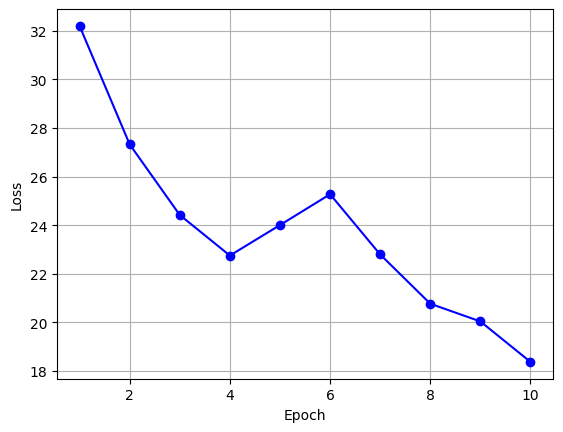

In [28]:
train(num_epochs, net, optimizer)